# Part II - Pisa Study 2012
## by Luca Brandt

## Investigation Overview

### Key Insights:

1. The countires test results do not differ that much
2. The math score is higher with higher father's schooling and internet access
3. Study time and gender impact the math test score 

## Dataset Overview

The PISA (Programm for International Student Assessment) measures 15-year-olds abilities in math, reading and science all over the world. The data contains responses from individual students, school principals and parents. 
The original PISA 2012 dataset contained information from 485,490 students and 636 features. For my analysis I used only a couple of variables. The most importent ones are: Country, gender, math score, reading score, science score, study time and parent's schooling. <br> <br>
In this investigation I examined which variables have an impact on the scores and how the countries compare to each other.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import pylab

%matplotlib inline

import matplotlib.pyplot as plt

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
def plots(x, y, title, rot=0):
    """ plots(x, y, title, rot)
        Function to set a plots x- and y-axis, title and the x-label rotation
        
        Args:
        x: x-label
        y: y-label
        title: title of plot
        rot: x-label rotation
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.xticks(rotation=rot)

In [10]:
pisa_all = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1');
pisa = pisa_all[['CNT', 'STIDSTD', 'SCHOOLID', 'ST01Q01', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST17Q01', 'ST26Q06', 'AGE', 'WEALTH', 'ESCS', 'SMINS', 'W_FSTUWT', 'PV1MATH', 'PV1SCIE', 'PV1READ']].copy()
pisa.rename(columns={'CNT':'country', 'STIDSTD':'student_id', 'SCHOOLID':'school_id', 'ST01Q01':'int_grade', 'ST03Q02':'birt_year', 'ST04Q01':'gender', 'ST13Q01':'mother_degree', 'ST17Q01':'father_degree', 'ST26Q06':'internet', 'AGE':'age', 'WEALTH':'wealth', 'ESCS':'eco_social_cultural_status', 'SMINS':'study_time_min_per_week', 'W_FSTUWT':'student_score_weight', 'PV1MATH':'math_score', 'PV1SCIE':'sci_score', 'PV1READ':'read_score'}, inplace=True)

In [11]:
base_color = sb.color_palette()[0]

## Internet Access vs Math Score

Let's investigate if the math score depends on internet accessibility.

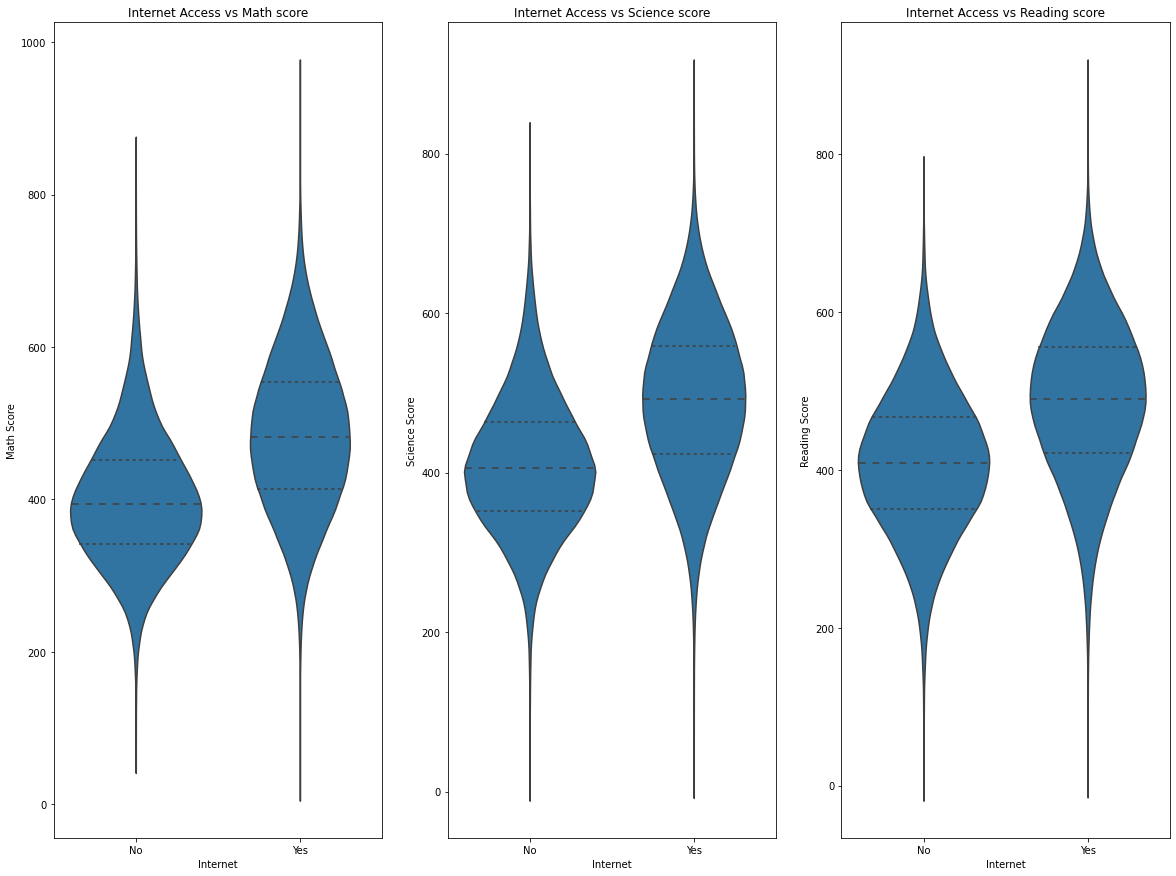

In [12]:
plt.rcParams["figure.figsize"] = (20,15);

# 3 plots to show the effect of internet access to the test scores
plt.subplot(1,3,1)
# Violinplot with quaritles
f = sb.violinplot(data=pisa, x='internet', y='math_score', inner='quartile', color=base_color)
f = plots("Internet", 'Math Score', "Internet Access vs Math score")

plt.subplot(1,3,2)
g = sb.violinplot(data=pisa, x='internet', y='sci_score', inner='quartile', color=base_color)
g = plots("Internet", 'Science Score', "Internet Access vs Science score")

plt.subplot(1,3,3)
h = sb.violinplot(data=pisa, x='internet', y='read_score', inner='quartile', color=base_color)
h = plots("Internet", 'Reading Score', "Internet Access vs Reading score")

Except for a few outliers in the 'yes' variable, the students with internet access do better in the all the tests. If this is due to the internet access or some underlying factors (like with more wealth comes more education but also more internet) cannot be answered here.

### Countries vs Test Scores

Let's take a look at a few selected european countries and see how well they performed in the tests.

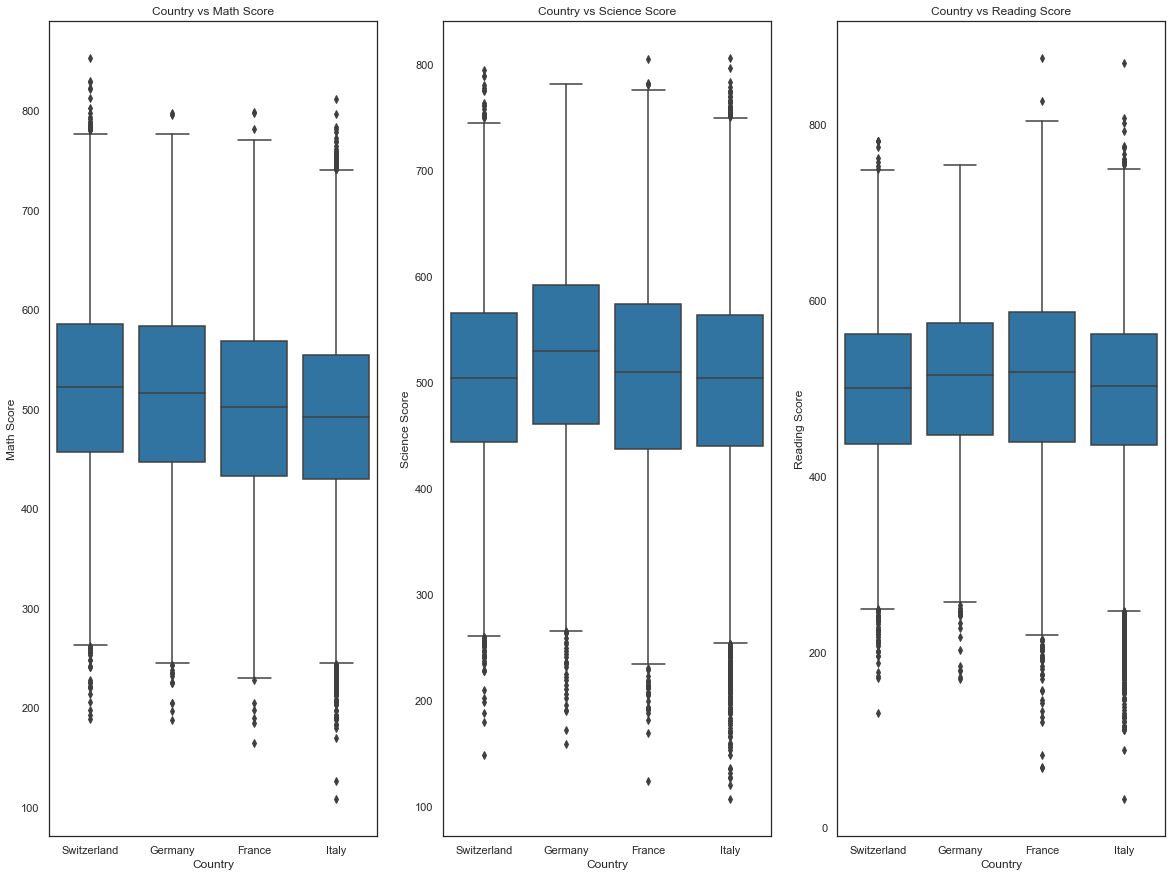

In [13]:
base_color = sb.color_palette()[0]
selected_countries = pisa.query('country == "Germany" or country == "France" or country == "Switzerland" or country == "Italy"')

plt.rcParams["figure.figsize"] = (20,15);
sb.set(style='white')

# 3 plots to compare the countries to each other regarding the math, science and reading scores
plt.subplot(1,3,1)
# Boxplot with countries and math score
f = sb.boxplot(data=selected_countries, x='country', y='math_score', color=base_color)
f = plots("Country", 'Math Score', "Country vs Math Score")

plt.subplot(1,3,2)
g = sb.boxplot(data=selected_countries, x='country', y='sci_score', color=base_color)
g = plots("Country", 'Science Score', "Country vs Science Score")

plt.subplot(1,3,3)
g = sb.boxplot(data=selected_countries, x='country', y='read_score', color=base_color)
g = plots("Country", 'Reading Score', "Country vs Reading Score")

In general, all those countries perform rather similar. For math the swiss excels, in science it's germany and for reading there is hardy a difference between the countires. <br>
It seems that Italy has more outliers in the low scores than the other countries in each test. That must reduces their average quiet a bit. It might make sence for the schools in Italy to focus a little bit more on students that struggle to help them improve.

## Internet access and farther's education vs math score

The father's schooling and internet access have an impact on the students performance. Let's look at all of these variables togehter. 

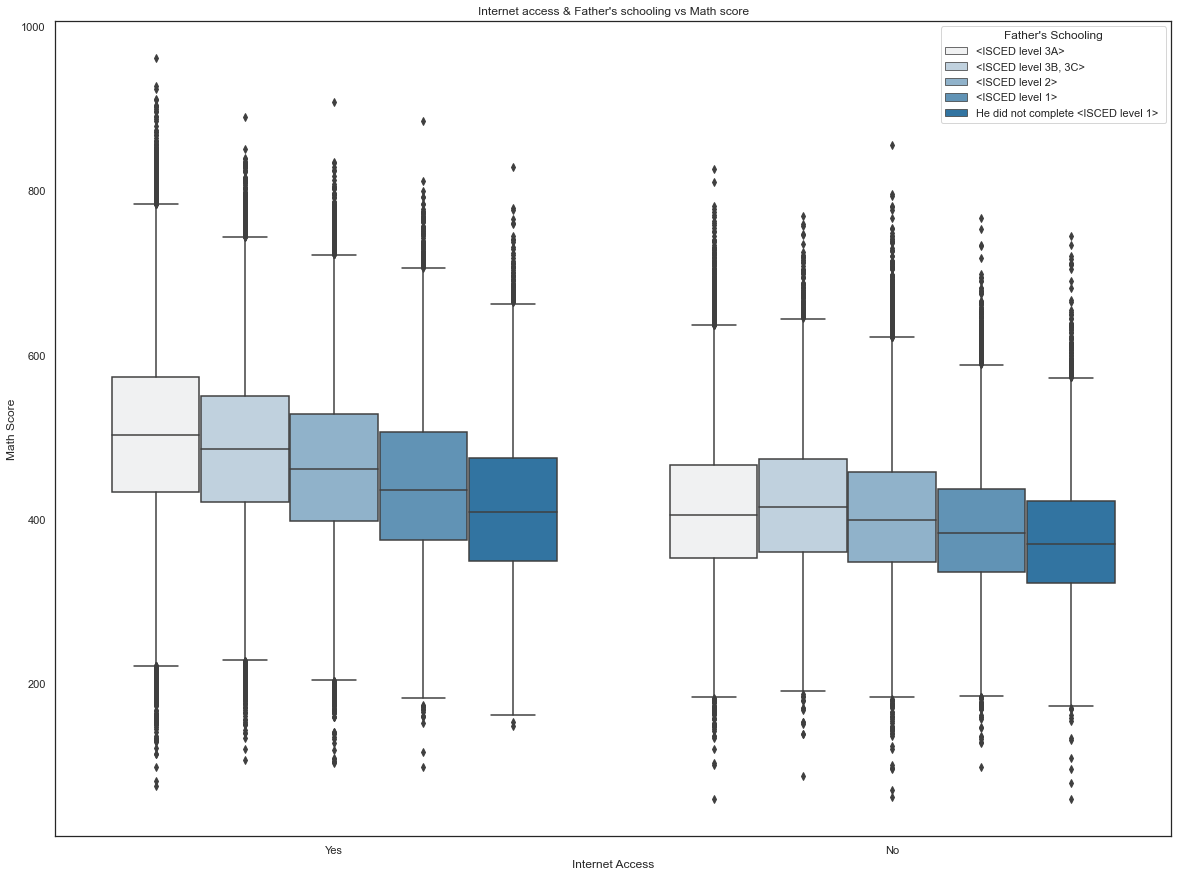

In [14]:
order_list = ['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ', '<ISCED level 1> ', 'He did not complete <ISCED level 1> ']
plt.rcParams["figure.figsize"] = (20,15);

# Boxplot with the Internet Access on the x-axis and the math score on the y-axis. The third variable is father's schooling.
# 2 categorical and one qualitative variable. Ordered by father's schooling
f = sb.boxplot(data=pisa, x='internet', y='math_score', hue='father_degree', order=['Yes', 'No'], hue_order=order_list, color=base_color);
f = plots("Internet Access", 'Math Score', "Internet access & Father's schooling vs Math score")
f = plt.legend(title="Father's Schooling");

### Conclusion
We can see that the higher the father's schooling and with Internet access, the better the student does at the math test. There is only one exception. When the kid does not have internet access and the father's schooling is ISCED level 3B, 3C the mean is higher than for students with fathers with ISCED level 3A education. The very best ones, the outliers, are still better when the father has a higher education. <br>
Also, it seems that internet access is more importent than the father's education. All the groups with internet performed better than the ones without, regardless of the father's schooling. But again, that is very likly the sum of other factors as well. <br>
The best chances to succeed has a student with internet access and a father with the highest schooling possible. Reversely, a student without internet access and a father with low education is likely to score not quiet as high as the other groups.

### Study time and Gender vs Math Score

We saw before that most pupils' scores improved with more studying. Now let's see how that changes with gender.

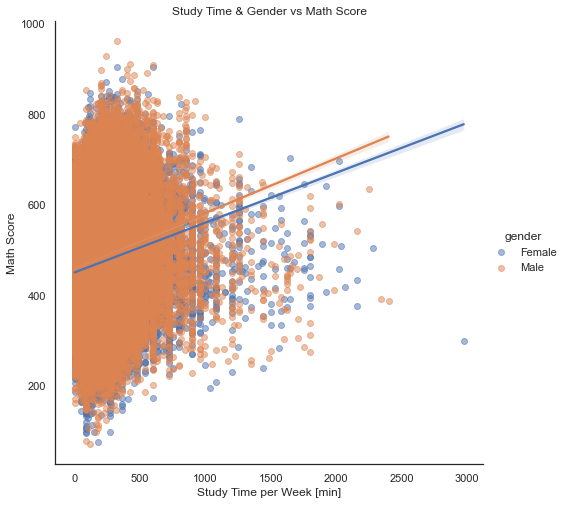

In [15]:
# Seaborn's lmplot. Scatter plot with regression lines for boys and girls. transparency=0.5
# x-axis: Study time. y-axis: math score. hue: gender
f = sb.lmplot(data=pisa, x='study_time_min_per_week', y='math_score', hue='gender', height=7, scatter_kws={'alpha':0.5});
f = plots("Study Time per Week [min]", 'Math Score', "Study Time & Gender vs Math Score")

### Conclusion
Boys and girls can improve their grades with more studying. The graphs are almost parallel thus males and females can increase their math score almost equally well with more studying. <br>
So the biggest difference is that boys simply score higher in math.

In [18]:
!jupyter nbconvert pisa_study_project_II.ipynb --to slides --post serve --no-input

[NbConvertApp] Converting notebook pisa_study_project_II.ipynb to slides
[NbConvertApp] Writing 619415 bytes to pisa_study_project_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\lucab\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\lucab\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\lucab\anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\lucab\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lucab\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\lucab\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", li